# Subsampling

## Dependencies

In [8]:
from __future__ import print_function, division
from numpy import *
%matplotlib notebook
from matplotlib.pyplot import *
from IPython.display import *

import audio.wave as wave
from audio.filters import *
from audio.fourier import *
import nltk; nltk.download("timit")
import audio.index

[nltk_data] Downloading package timit to /home/boisgera/nltk_data...
[nltk_data]   Package timit is already up-to-date!


## Audio Files / Waveform

In [58]:
df = 16000; dt = 1/df

In [59]:
t = r_[0.:3.0:dt]
f = 440.0
x = 0.5*sin(2*pi*f*t)+0.5*sin(2*pi*5000*t)
wave.write(x, "x.wav", df=df)

In [87]:
utterance = audio.index.search(type=audio.index.Utterance)[19]
t = r_[0.:3.0:dt]
f = 440.0
x = utterance.audio
x = x /amax(x)
wave.write(x, "x.wav", df=df)

In [88]:
Audio("x.wav")

<IPython.core.display.Javascript object>


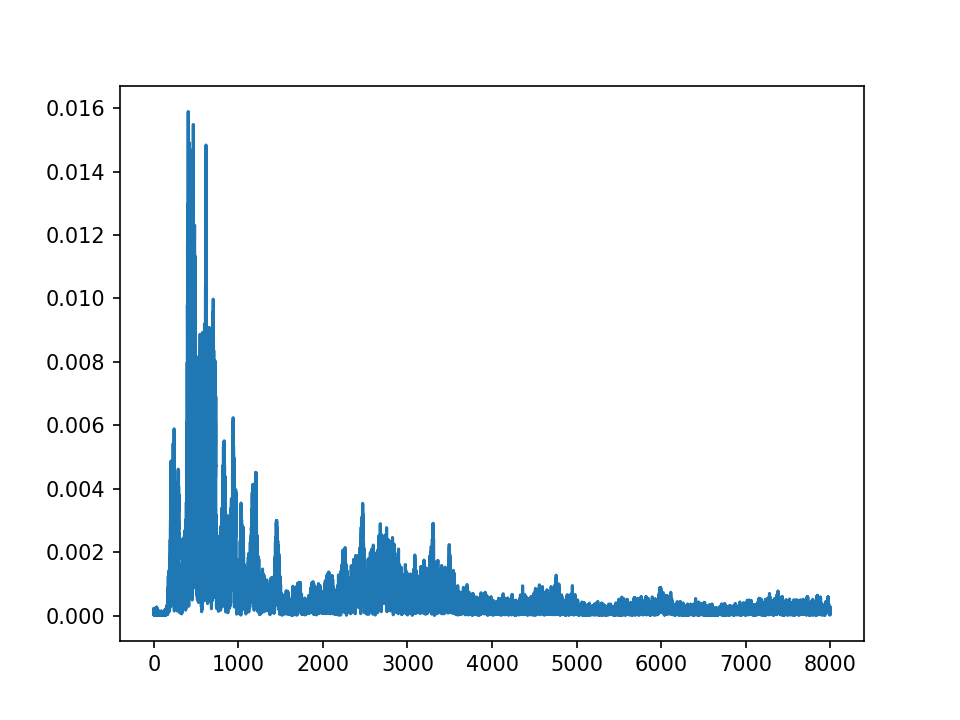

In [89]:
figure()
Fx = F(x, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0: df/2.0/2**20]
plot(f, abs(Fx(f)))

In [90]:
x2 = x[::2]
df2 = df/2
dt2 = 1/df2
wave.write(x2, "x2.wav", df=df/2)
display(Audio("x.wav"))
display(Audio("x2.wav"))

<IPython.core.display.Javascript object>


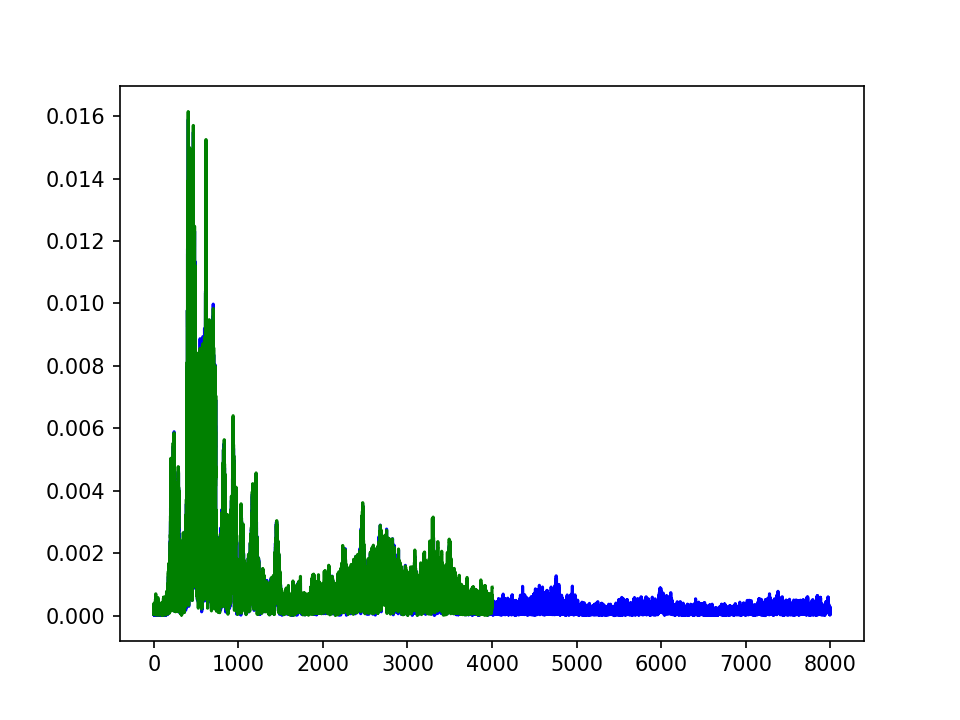

In [91]:
figure()
Fx2 = F(x2, dt=dt2, power_of_two=True)
f2 = r_[0.0:df2/2.0: df2/2.0/2**20]
plot(f, abs(Fx(f)), "blue")
plot(f2, abs(Fx2(f2)), "green")

<IPython.core.display.Javascript object>


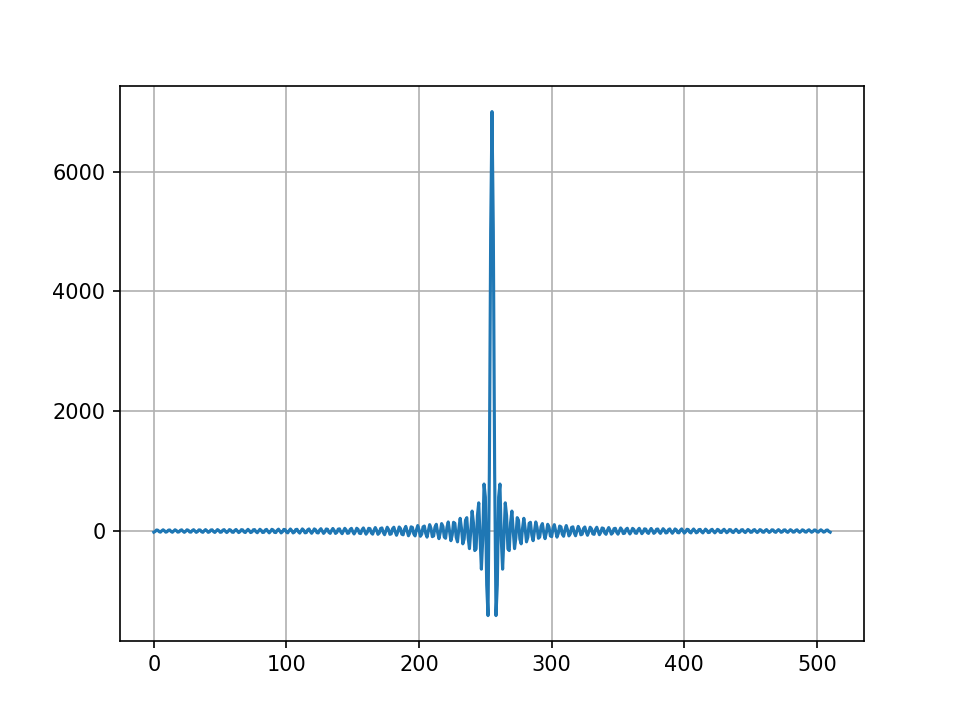

In [92]:
fc = 3500
h = low_pass(fc, dt)
n = 511
hn = h(n)
figure()
plot(hn)
grid()

<IPython.core.display.Javascript object>


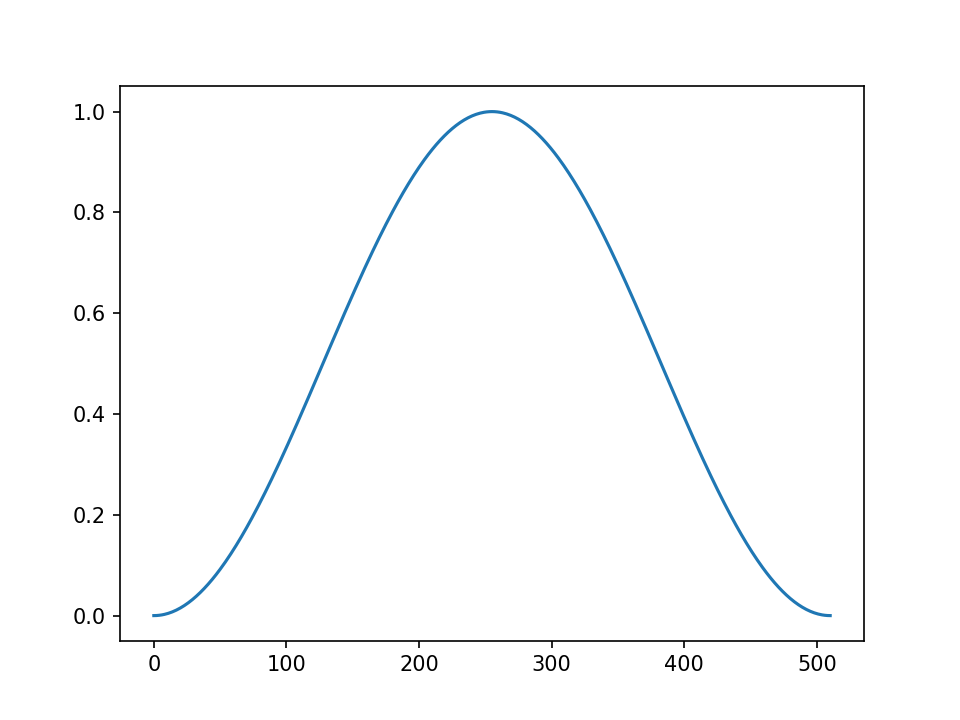

In [93]:
figure()
w = hanning(511)
plot(w)

<IPython.core.display.Javascript object>


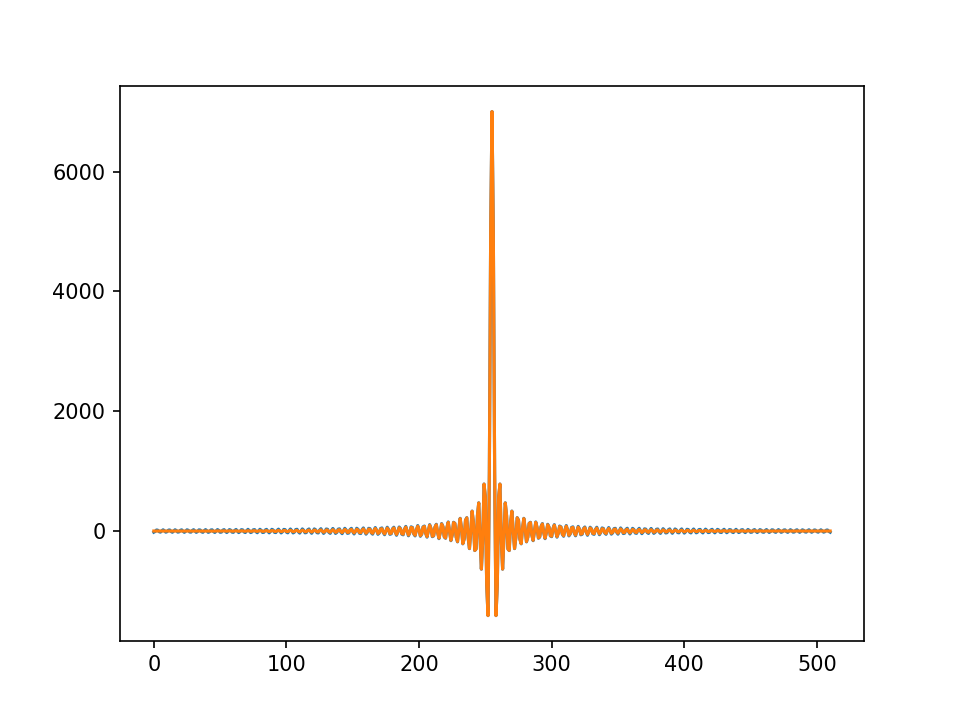

In [94]:
figure()
plot(hn)
plot(hn * w)

<IPython.core.display.Javascript object>


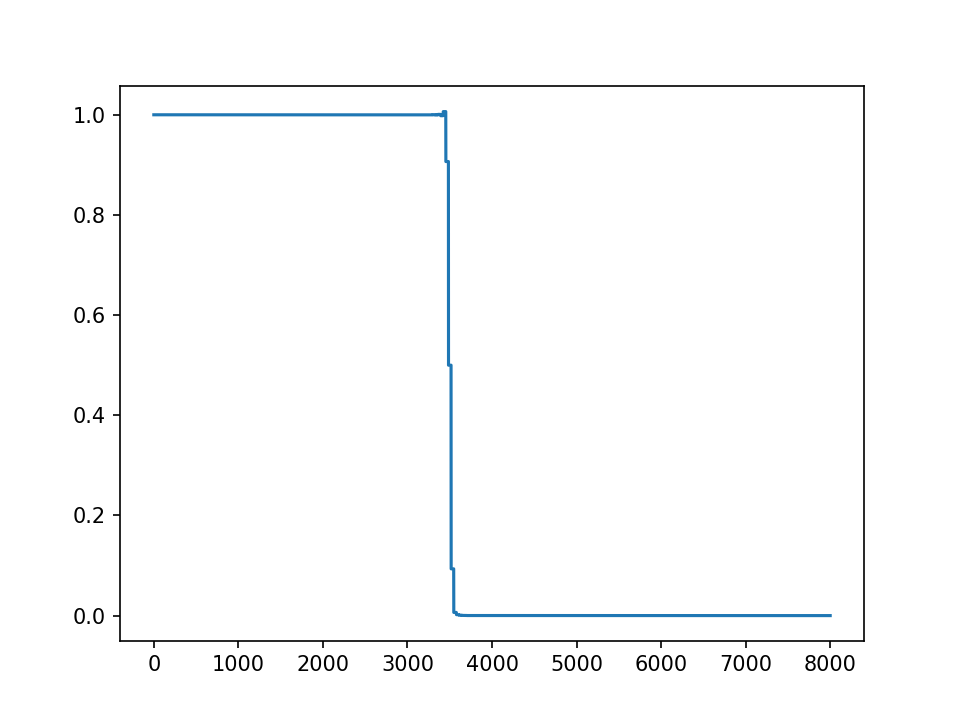

In [95]:
figure()
Fhn = F(hn*w, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0: df/2.0/2**20]
plot(f, abs(Fhn(f)))

<IPython.core.display.Javascript object>


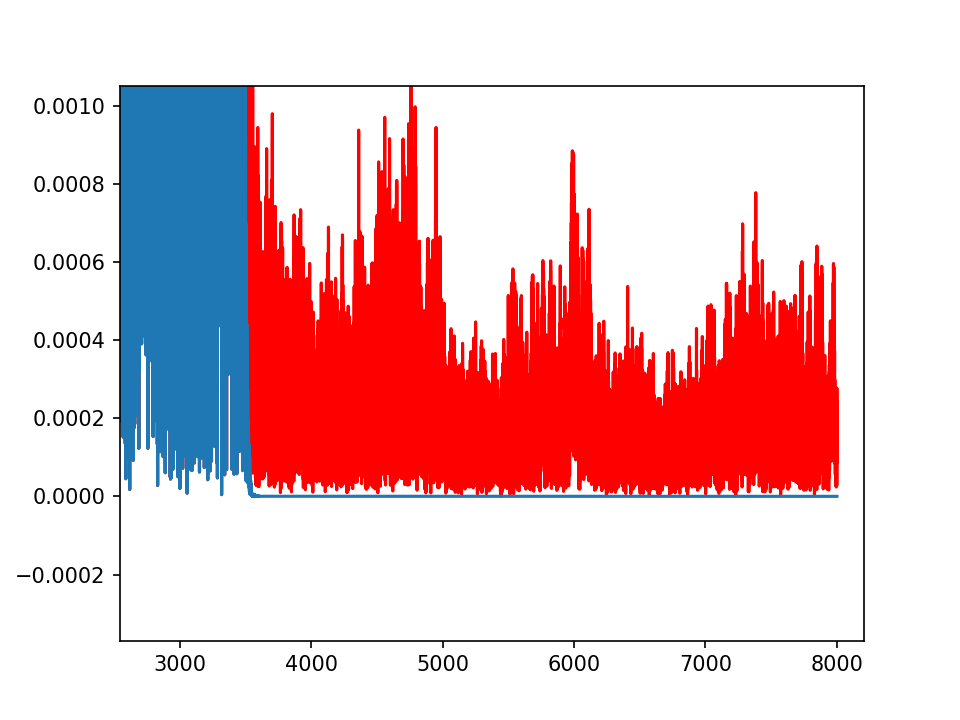

In [96]:
xf = dt*convolve(x, hn*w)
figure()
Fxf = F(xf, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0: df/2.0/2**20]
plot(f, abs(Fx(f)), "r")
plot(f, abs(Fxf(f)))

In [98]:
xf2 = xf[::2]
wave.write(xf2,"xf2.wav", df=df2)
display(Audio("x.wav"))
display(Audio("xf2.wav"))